In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import sympy as sp
sp.init_printing()

In [260]:
def clamp(value, minimum, maximum):
    if value < minimum:
        return minimum
    elif value > maximum:
        return maximum
    else:
        return value
    
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def comma_separated(x):
    s = '['
    for i in x:
        s+=str(i)
        s+=','
    return s[:len(s)-1] + ']'

def p_in(x, p):
    return x**p

def p_out(x, p):
    return 1+(-1)**(1+p)*(x-1)**p
    
def p_in_out(x, p):
    if x <= 0.5:
        return p_in(2*x, p)/2
    return 0.5+(p_out(2*(x-0.5), p))/2

def e_in(x, p):
    m = math.exp(-p)
    return ((math.exp(p*(x-1))-m)/(1-m))

def e_out(x, p):
    m = math.exp(-p)
    return 1-((math.exp(-p*x)-m)/(1-m))

def e_in_out(x, p):
    if x <= 0.5:
        return e_in(2*x, p)/2
    return 0.5+(e_out(2*(x-0.5), p))/2

def e_out_in(x, p):
    if x <= 0.5:
        return e_out(2*x, p)/2
    return 0.5+(e_in(2*(x-0.5), p))/2

def e_inverse_in(x, p):
    ep = math.exp(p)
    e_p = math.exp(-p)
    return 1+(np.log((x*(ep-1)+1)*e_p))/p

def e_inverse_out(x, p):
    e_p = math.exp(-p)
    return -np.log((1-x)*(1-e_p)+e_p)/p

def e_inverse_in_out(x, p):
    if x <= 0.5:
        return e_inverse_in(2*x, p)/2
    return 0.5+(e_inverse_out(2*(x-0.5), p))/2

def circle_in(x):
    return 1-math.sqrt(1-x*x)

def circle_out(x):
    return math.sqrt(1-(x-1)**2)

def circle_in_out(x):
    if x <= 0.5:
        return circle_in(2*x)/2
    return 0.5+(circle_out(2*(x-0.5)))/2

def sech(x):
    return 1/math.cosh(x)

In [240]:
def plot_pdf(func, intervals, tot_trials):
    x = np.array([i/intervals for i in range(0, intervals)])
    y = np.array([0 for i in range(0, intervals)])
    for i in range(tot_trials):
        r = func()
        y[clamp(int(r/(1/intervals)), 0, intervals-1)] += 1
    
    y = y*intervals/tot_trials
    # y = moving_average(y, 5)
    max_y = max(y)
    
    plt.plot(x[:len(y)], y)
    plt.xlim(0, 1-1/intervals)
    plt.ylim(0, max_y)
    # plt.show()
    
    print(comma_separated(x))
    print()
    print(comma_separated(y))

In [301]:
def default_random():
    return random.random()

def default_tri():
    return random.triangular()

def squared():
    r = random.random()
    return r*r

def square_root():
    r = random.random()
    return math.sqrt(r)

def my_right_trapizuim(p1):
    '''The distribution of this function is P(x) = 2*(p1-1)*x + 2-p1
    where p1 is P(1)
    It's a very good approximation and nearly exact if p1 > 0.5'''
    r1 = random.random()
    _p1 = 1-p1
    return ((1-math.sqrt(r1))%_p1)*(1/_p1)

def my_u():
    r1 = random.random()
    # return math.sin(math.pi/2 * r1)**2
    return p_in_out(r1, 5)

def my_tri():
    r1 = random.random()
    r2 = random.random()
    return (r1+r2)/2

def my_upside_down_tri():
    r1 = random.random()
    if r1 <= 0.5:
        return 0.5-math.sqrt(r1*2)*0.5
    return 0.5+math.sqrt(2*(r1-0.5))*0.5

def my_m():
    r1 = random.random()
    _p = 3
    if r1 < 0.25:
        return e_out(4*r1, _p)/4
    elif r1 > 0.75:
        return 0.75+e_in(4*(r1-0.75), _p)/4
    return 0.25+e_in_out(2*r1-0.5, _p)/2

def my_gauss():
    # r = [random.random() for i in range(4)]
    r = 0
    n = 10
    for i in range(n):
        r += random.random()
    return r/n

def my_witch_hat():
    r1 = random.random()
    _p = 5
    return e_out_in(r1, _p)

def custom_r():
    r1 = random.random()
    _p = 5
    return e_out_in(r1, 5)

[0.0,0.016666666666666666,0.03333333333333333,0.05,0.06666666666666667,0.08333333333333333,0.1,0.11666666666666667,0.13333333333333333,0.15,0.16666666666666666,0.18333333333333332,0.2,0.21666666666666667,0.23333333333333334,0.25,0.26666666666666666,0.2833333333333333,0.3,0.31666666666666665,0.3333333333333333,0.35,0.36666666666666664,0.38333333333333336,0.4,0.4166666666666667,0.43333333333333335,0.45,0.4666666666666667,0.48333333333333334,0.5,0.5166666666666667,0.5333333333333333,0.55,0.5666666666666667,0.5833333333333334,0.6,0.6166666666666667,0.6333333333333333,0.65,0.6666666666666666,0.6833333333333333,0.7,0.7166666666666667,0.7333333333333333,0.75,0.7666666666666667,0.7833333333333333,0.8,0.8166666666666667,0.8333333333333334,0.85,0.8666666666666667,0.8833333333333333,0.9,0.9166666666666666,0.9333333333333333,0.95,0.9666666666666667,0.9833333333333333]

[0.21,0.20988,0.21756,0.2286,0.2322,0.23928,0.25188,0.26484,0.26844,0.29088,0.31128,0.318,0.34716,0.35352,0.38268,0.41652,0.4512,0

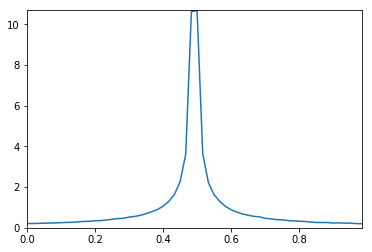

In [302]:
# plot_pdf(my_gauss, 60, 500000)
plot_pdf(my_witch_hat, 60, 500000)
# plot_pdf(my_upside_down_tri, 50, 500000)